<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

**Проведение средствами SQL анализа данных  сервиса для чтения книг по подписке.** <br>
<b>Цель исследования:</b><br>
Куплен крупный сервис для чтения книг по подписке. Необходимо проанализировать базу данных.<br>
В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.<br><br>
<b>Задание:</b> <br>
- Посчитайте, сколько книг вышло после 1 января 2000 года;<br>
- Для каждой книги посчитайте количество обзоров и среднюю оценку;<br>
- Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;<br>
- Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;<br>
- Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.<br>
- Получите ответы, используя только язык запросов SQL. Pandas допускается только для хранения и вывода результатов.

**Описание проекта**<br/>
<b>Данные:</b><br/>
<b>Таблица `books`</b><br/>
Содержит данные о книгах:<br/>
- `book_id` — идентификатор книги;<br/>
- `author_id` — идентификатор автора;<br/>
- `title` — название книги;<br/>
- `num_pages` — количество страниц;<br/>
- `publication_date` — дата публикации книги;<br/>
- `publisher_id` — идентификатор издателя.<br/><br/>
<b>Таблица `authors`</b><br/>
Содержит данные об авторах:<br/>
- `author_id` — идентификатор автора;<br/>
- `author` — имя автора.<br/><br/>
<b>Таблица `publishers`</b><br/>
Содержит данные об издательствах:<br/>
- `publisher_id` — идентификатор издательства;<br/>
- `publisher` — название издательства;<br/><br/>
<b>Таблица `ratings`</b><br/>
Содержит данные о пользовательских оценках книг:<br/>
- `rating_id` — идентификатор оценки;<br/>
- `book_id` — идентификатор книги;<br/>
- `username` — имя пользователя, оставившего оценку;<br/>
- `rating` — оценка книги.<br/><br/>
<b>Таблица `reviews`</b><br/>
Содержит данные о пользовательских обзорах на книги:<br/>
- `review_id` — идентификатор обзора;<br/>
- `book_id` — идентификатор книги;<br/>
- `username` — имя пользователя, написавшего обзор;<br/>
- `text` — текст обзора.<br/><br/>
<b>Пути к файлам:</b><br/>
Следуйте инструкции, изложенной в файле - Подключение к базе данных .pdf

Структура всех таблиц

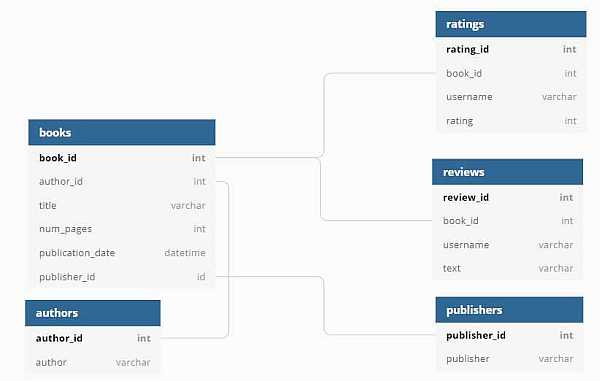

**Содержание**<br/>
<a name="contents"></a><br/>
<a name="chapter_0"></a>    
[**1. Изучение данных из полученного файла данных**](#chapter_1.)<br/>
[1.1. Выставление окружения и импорт библиотек.](#chapter_1.1.)<br/> 
[1.2. Подключение к базе данных и получение таблиц.](#chapter_1.2.)<br/>
    
[**2. Задания.**](#chapter_2.)<br/>
[2.1. Считаем, сколько книг вышло после 1 января 2000 года.](#chapter_2.1.)<br/>
[2.2. Для каждой книги считаем количество обзоров и среднюю оценку.](#chapter_2.2.)<br/>
[2.3. Определение издательства, которое выпустило наибольшее число книг толще 50 страниц.](#chapter_2.3.)<br/>
[2.4. Определение автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками.](#chapter_2.4.)<br/>
[2.5. Считаем среднее количество обзоров от пользователей, которые поставили больше 50 оценок.](#chapter_2.5.)<br/>

[**3. Выводы**](#chapter_3.) 

<a name="chapter_1."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>1. Изучение данных из полученных файлов данных.</b> <br/>
</div>


<a name="chapter_1.1."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>1.1. Выставление окружения и импорт библиотек.</b> <br/>
</div>

1.1.1. Делаем импорт библиотек, используемых в данном проекте.

In [1]:
import pandas as pd
from sqlalchemy import create_engine # библиотека для коннекта со сторонним сервером

import datetime as dt


In [2]:
#!pip install pandas -U

#!conda list pandas
#!pip install pandas==1.2.4 # инсталлировал версию 1.2.4 С версией 1.3.3 - не совсем правильно рисовалась легенда графиков
!conda list pandas

# packages in environment at C:\Users\Tachkov\anaconda3:
#
# Name                    Version                   Build  Channel
pandas                    1.4.1                    pypi_0    pypi


1.1.2. Корректируем вывод табличных данных с помощью функции set_option() в Pandas

In [3]:
#pd.set_option('max_rows', 5) # поставим ограничение на вывод 5 строк https://habr.com/ru/post/521894/
pd.set_option('display.max_columns', None) # снимаем ограничение на отображение колонок
pd.set_option('display.float_format', '{:.2f}'.format) # ставим ограничение на количество выводимых знаков у float 
#pd.set_option('display.max_colwidth', 110) # снимаем ограничение на длину строк
#pd.set_option('display.max_colwidth', -1) # чтобы отобразились все символы в ячейках датафрейма

<a name="chapter_1.2."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>1.2. Подключение к базе данных и получение таблиц.</b> <br/>
</div>

In [4]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
 'pwd': 'Sdf4$2;d-d30pp', # пароль
 'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
 'port': 6432, # порт подключения
 'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})


Этот способ убрать скроллинг при выводе увидел на <br/> 
https://askdev.ru/q/kak-izbezhat-vyvoda-v-prokruchivaemye-kadry-v-jupyter-notebook-665426/<br/> 
Интересно, есть еще какой-нибудь способ? Просто иначе выводится в окно со скроллингом

In [5]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Посмотрим на полученные датасеты:

In [6]:
for table_name in ['books', 'authors', 'publishers', 'ratings', 'reviews']:
    query = '''
    SELECT *
    FROM {} 
    '''.format(table_name)
    print(table_name)
    request = pd.io.sql.read_sql(query, con = engine)
    display(request.head())
    request.info()
    print("_"*90)

books


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB
__________________________________________________________________________________________
authors


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB
__________________________________________________________________________________________
publishers


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB
__________________________________________________________________________________________
ratings


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB
__________________________________________________________________________________________
reviews


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB
__________________________________________________________________________________________


Все датасеты у нас в наличии. Пока видна некоторая проблема с данными столбца publication_date в books, они формата    object

Учитывая, что с SQL я пока только строго на Вы, попробуем все задачи на полученных датасетах проверять еще и обычными методами, с помощью Pandas. Мне так будет немного легче...

In [7]:
query_books = ''' SELECT * FROM books; ''' 
books = pd.io.sql.read_sql(query_books, con = engine)

query_reviews = ''' SELECT * FROM reviews; ''' 
reviews = pd.io.sql.read_sql(query_reviews, con = engine)

query_ratings = ''' SELECT * FROM ratings; ''' 
ratings = pd.io.sql.read_sql(query_ratings, con = engine)

query_publishers = ''' SELECT * FROM publishers; ''' 
publishers = pd.io.sql.read_sql(query_publishers, con = engine)

query_authors = ''' SELECT * FROM authors; ''' 
authors = pd.io.sql.read_sql(query_authors, con = engine)

Не совсем знаю, как проверить средствами SQL на отсутствующие данные, то хоть проверю, как могу:

In [8]:
names = [books, reviews, ratings, publishers, authors]
for name in names:
    missing_values = name.isnull().sum()
    display(missing_values)

book_id             0
author_id           0
title               0
num_pages           0
publication_date    0
publisher_id        0
dtype: int64

review_id    0
book_id      0
username     0
text         0
dtype: int64

rating_id    0
book_id      0
username     0
rating       0
dtype: int64

publisher_id    0
publisher       0
dtype: int64

author_id    0
author       0
dtype: int64

Пропусков данных нет.

<a name="chapter_2."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2. Задания.</b> <br/>
</div>

<a name="chapter_2.1."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.1. Считаем, сколько книг вышло после 1 января 2000 года.</b> <br/>
</div>

Если слово "после", то 2000-01-01 в этот диапазон не входит, иначе было бы применено "с"

In [9]:
books['publication_date'] = pd.to_datetime(books['publication_date'], format='%Y-%m-%d')
books_time = books.query('publication_date > "2000-01-01"')
display(books_time['book_id'].count())

819

Правильный ответ получен. А сейчас SQL:

In [10]:
query_1 = '''
               
SELECT COUNT(book_id) 
FROM books
    WHERE publication_date > '2000-01-01'
'''
request_1 = pd.io.sql.read_sql(query_1, con = engine)

print('После 1 января 2000 года вышло %s книг.' %(request_1.iloc[0,0])) #https://russianblogs.com/article/25531251569/

После 1 января 2000 года вышло 819 книг.


Совпало, что очень радует ))

<b>После 1 января 2000 года вышло 819 книг.</b>

<a name="chapter_2.2."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.2. Для каждой книги считаем количество обзоров и среднюю оценку.</b> <br/>
</div>

In [11]:
ratings_reviews = ratings.merge(reviews, left_on=['book_id'], right_on=['book_id'], how = 'left')
ratings_reviews_avg = ratings_reviews.groupby('book_id').agg(num_rev=(
    'review_id','nunique'), avg_rating=('rating','mean'))
books_reviews_ratings = books[['title','book_id']].merge(ratings_reviews_avg, left_on=['book_id'], right_on=['book_id'], how = 'left')
books_reviews_ratings = books_reviews_ratings.sort_values(by=['num_rev', 'avg_rating'], ascending = False)
display(books_reviews_ratings)

,title,book_id,num_rev,avg_rating
947,Twilight (Twilight #1),948,7,3.66
301,Harry Potter and the Prisoner of Azkaban (Harr...,302,6,4.41
298,Harry Potter and the Chamber of Secrets (Harry...,299,6,4.29
655,The Book Thief,656,6,4.26
733,The Glass Castle,734,6,4.21
...,...,...,...,...
190,Disney's Beauty and the Beast (A Little Golden...,191,0,4.00
220,Essential Tales and Poems,221,0,4.00
386,Leonardo's Notebooks,387,0,4.00
82,Anne Rice's The Vampire Lestat: A Graphic Novel,83,0,3.67


И средствами SQL:

In [12]:
query_2 = '''
SELECT books.book_id, books.title, COUNT(DISTINCT review_id) AS num_rev, AVG (rating) AS avg_rating
FROM books
    LEFT JOIN reviews ON reviews.book_id = books.book_id
    LEFT JOIN ratings ON ratings.book_id = books.book_id
    GROUP BY books.book_id
    ORDER BY num_rev DESC, avg_rating DESC 
'''
num_rev_avg_rating = pd.io.sql.read_sql(query_2, con = engine)
num_rev_avg_rating


,book_id,title,num_rev,avg_rating
0,948,Twilight (Twilight #1),7,3.66
1,302,Harry Potter and the Prisoner of Azkaban (Harr...,6,4.41
2,299,Harry Potter and the Chamber of Secrets (Harry...,6,4.29
3,656,The Book Thief,6,4.26
4,734,The Glass Castle,6,4.21
...,...,...,...,...
995,191,Disney's Beauty and the Beast (A Little Golden...,0,4.00
996,387,Leonardo's Notebooks,0,4.00
997,221,Essential Tales and Poems,0,4.00
998,83,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.67


Полное совпадение есть, <b>список по каждой книге с количеством обзоров и средней оценкой - сделан</b>.

<a name="chapter_2.3."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.3. Определение издательства, которое выпустило наибольшее число книг толще 50 страниц.</b> <br/>
</div>

In [13]:
books_50 = books.query('num_pages > 50')
books_50_pub = books_50.groupby('publisher_id').agg(num_book=('book_id','count'))
books_publishers = books_50_pub.merge(publishers, left_on=['publisher_id'], right_on=['publisher_id'], how = 'left')
display(books_publishers.sort_values('num_book', ascending = False).head(1))

,publisher_id,num_book,publisher
207,212,42,Penguin Books


И средствами SQL по похожей логике:

In [14]:
query_3 = '''
SELECT publishers.publisher_id, publishers.publisher, COUNT(books.book_id) as num_book
FROM publishers
    JOIN books ON publishers.publisher_id = books.publisher_id
    WHERE books.num_pages > 50
    GROUP BY publishers.publisher_id
    ORDER BY num_book DESC
    LIMIT 1
'''
number_of_books_50 = pd.io.sql.read_sql(query_3, con = engine)
number_of_books_50

,publisher_id,publisher,num_book
0,212,Penguin Books,42


<b>Издательство Penguin Books с publisher_id выпустило наибольшее число книг толще 50 страниц в количестве 42 шт.</b>

<a name="chapter_2.4."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.4. Определение автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками.</b> <br/>
</div>

In [15]:
ratings_50 = ratings.groupby('book_id').agg(rating_count=('rating','count'))
ratings_50 = ratings_50.query('rating_count >= 50')
ratings_50_books = ratings_50.merge(books, left_on=['book_id'], right_on=['book_id'], how = 'left')
ratings_50_books_authors = ratings_50_books.merge(
    authors, left_on=['author_id'], right_on=['author_id'], how = 'left')
ratings_50_books_authors_rate = ratings_50_books_authors.merge(
    ratings, left_on=['book_id'], right_on=['book_id'], how = 'left')
ratings_max = ratings_50_books_authors_rate.groupby('author').agg(author_id=('author_id','mean'), rating_mean=('rating','mean'))
display(ratings_max.sort_values('rating_mean', ascending = False).head(1))

,author_id,rating_mean
author,,
J.K. Rowling/Mary GrandPré,236.00,4.29


И по похожей логике, но условие по подзапросу:

In [16]:
query_4 = '''
SELECT authors.author_id, authors.author, AVG(avg_rating) AS avg_rating_50
FROM authors
    JOIN books ON books.author_id = authors.author_id
    JOIN(
    SELECT books.book_id, COUNT(rating_id) AS rating_count, AVG (rating) AS avg_rating
FROM books
    JOIN ratings ON ratings.book_id = books.book_id
    GROUP BY books.book_id) AS subquery ON subquery.book_id = books.book_id
    WHERE rating_count >= 50
    GROUP BY authors.author_id, authors.author
    ORDER BY avg_rating_50 DESC
    LIMIT 1
'''
author_id_name_mean_rating = pd.io.sql.read_sql(query_4, con = engine)
author_id_name_mean_rating

,author_id,author,avg_rating_50
0,236,J.K. Rowling/Mary GrandPré,4.28


Округление где-то не сошлось. <b>Автор с самой высокой средней оценкой книг, при учете книг с 50 и более оценками -  	автор J.K. Rowling/Mary GrandPré с оценкой 4.28 и author_id равным 236</b>.

<a name="chapter_2.5."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.5. Считаем среднее количество обзоров от пользователей, которые поставили больше 50 оценок.</b> <br/>
</div>

In [17]:
ratings_50 = ratings.groupby('username').agg(rating_count=('rating','count'))
ratings_50 = ratings_50.query('rating_count > 50')
ratings_50_username_reviews = ratings_50.merge(
    reviews, left_on=['username'], right_on=['username'], how = 'left')
mean_reviews_ratings_50 = ratings_50_username_reviews['review_id'].count() / len(
    ratings_50_username_reviews['username'].unique())
display(mean_reviews_ratings_50)

24.333333333333332

И примерно по той же логике:

In [18]:
query_5 = '''
SELECT AVG(count)
FROM (
    SELECT reviews.username, COUNT(reviews.review_id)
FROM reviews
JOIN (
SELECT *
FROM
    (SELECT ratings.username, COUNT(ratings.rating_id) as num_ratings
FROM ratings
    GROUP BY ratings.username
    ORDER BY num_ratings DESC
    ) AS subquery_1
WHERE num_ratings > 50
    ) AS subquery_2 ON subquery_2.username = reviews.username
    GROUP BY reviews.username
    ) AS subquery_3
'''
mean_reviews_username_50 = pd.io.sql.read_sql(query_5, con = engine)
print('Cреднее количество обзоров от пользователей, которые поставили больше 50 оценок -  %s.' %(
    mean_reviews_username_50.iloc[0,0]))

Cреднее количество обзоров от пользователей, которые поставили больше 50 оценок -  24.333333333333332.


Сошлось. <b>Cреднее количество обзоров от пользователей, которые поставили больше 50 оценок -  24.33</b>

<a name="chapter_3."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>3. Выводы.</b> <br/>
</div>

В ходе исследования были получены следующие ответы на задания:<br/><br/>
3.1. После 1 января 2000 года вышло 819 книг.<br/><br/>
3.2. Cписок по каждой книге с количеством обзоров и средней оценкой - сделан, первые пять позиций:<br/>
948 	Twilight (Twilight #1) 	1120 	3.66<br/>
750 	The Hobbit or There and Back Again 	528 	4.12<br/>
673 	The Catcher in the Rye 	516 	3.83<br/>
302 	Harry Potter and the Prisoner of Azkaban (Harr... 	492 	4.41<br/><br/>
3.3. Издательство Penguin Books с publisher_id выпустило наибольшее число книг толще 50 страниц в количестве 42 шт.<br/><br/>
3.4. Автор с самой высокой средней оценкой книг, при учете книг с 50 и более оценками - автор J.K. Rowling/Mary GrandPré с оценкой 4.28 и author_id равным 236<br/><br/>
3.5. Cреднее количество обзоров от пользователей, которые поставили больше 50 оценок -  24.33